<a href="https://colab.research.google.com/github/victoralves87/analiseDados-colab/blob/main/ETL(smartphone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/smartphones_data.csv.csv')
df.head()

,brand_name,Name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,has_5g,processor_brand,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types
0,vivo,vivo v50,34999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,50.0,1,6.77,120.0,amoled display
1,realme,realme p3 pro,21999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.83,120.0,amoled display
2,realme,realme 14 pro plus,27999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,3,32.0,1,6.83,120.0,oled display
3,samsung,samsung galaxy s25 ultra,129999,12.0,android,256.0,5000,Yes,Yes,Yes,Yes,snapdragon,8.0,200.0,4,12.0,1,6.90,120.0,amoled display
4,vivo,vivo t3 pro,22999,8.0,android,128.0,5500,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.77,120.0,amoled display


# **ETL ↘**

In [7]:
df.shape


(3260, 20)

In [11]:
df.columns

Index(['brand_name', 'Name', 'Price', 'RAM', 'OS', 'storage', 'Battery_cap',
       'has_fast_charging', 'has_fingerprints', 'has_nfc', 'has_5g',
       'processor_brand', 'num_core', 'primery_rear_camera',
       'Num_Rear_Cameras', 'primery_front_camera', 'num_front_camera',
       'display_size(inch)', 'refresh_rate(hz)', 'display_types'],
      dtype='object')

In [13]:
#variaveis categoricas

cat_cols = [
    'brand_name', 'Name', 'OS', 'has_fast_charging', 'has_fingerprints',
    'has_nfc', 'has_5g', 'processor_brand', 'display_types'
]

In [14]:
#variaveis numericas

num_cols = [
    'Price', 'RAM', 'storage', 'Battery_cap', 'num_core',
    'primery_rear_camera', 'Num_Rear_Cameras',
    'primery_front_camera', 'num_front_camera',
    'display_size(inch)', 'refresh_rate(hz)'
]

In [12]:
# As colunas has_fingerprints,has_nfc,has_5g,num_core,refresh_rate(hz) possuem valorres faltantes ou nulos

df.isnull().sum()

,0
brand_name,0
Name,0
Price,0
RAM,0
OS,0
storage,0
Battery_cap,0
has_fast_charging,0
has_fingerprints,726
has_nfc,726


In [15]:
#utilizando meu array cat_cols para alterar os valores nulos por: "não informado"
df[cat_cols] = df[cat_cols].fillna('Não Informado')

In [17]:
df.isnull().sum()

,0
brand_name,0
Name,0
Price,0
RAM,0
OS,0
storage,0
Battery_cap,0
has_fast_charging,0
has_fingerprints,0
has_nfc,0


In [19]:
df['brand_name'].unique()  # ver se tem 'Samsung' vs 'samsung'


array(['vivo', 'realme', 'samsung', 'motorola', 'moto', 'oneplus', 'poco',
       'iqoo', 'xiaomi', 'Other', 'oppo', 'apple', 'honor', 'infinix',
       'google', 'lava', 'tecno', 'itel', 'nokia', 'asus', 'micromax',
       'lg', 'sony', 'ikall', 'lyf', 'gionee', 'intex', 'lenovo', 'htc',
       'coolpad', 'panasonic', 'karbonn', 'xolo'], dtype=object)

# **EDA ↘**

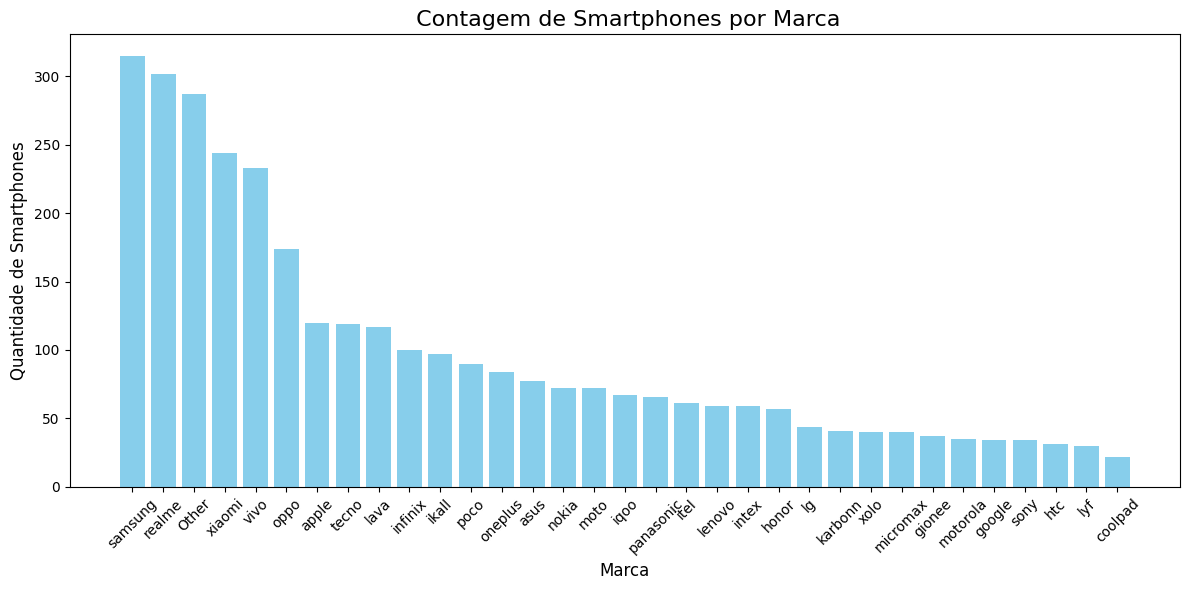

In [26]:
# Contagem de smartphones por marca
brand_counts = df['brand_name'].value_counts()

# Tamanho da figura
plt.figure(figsize=(12, 6))

# Gráfico de barras
plt.bar(brand_counts.index, brand_counts.values, color='skyblue')

# Títulos e rótulos
plt.title(' Contagem de Smartphones por Marca', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Quantidade de Smartphones', fontsize=12)

# Rotacionar os nomes das marcas para melhorar a visualização
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## **As marcas Samsung e Realme apresentam o maior número de smartphones, indicando uma grande presença de mercado em comparação com as outras marcas.**❗

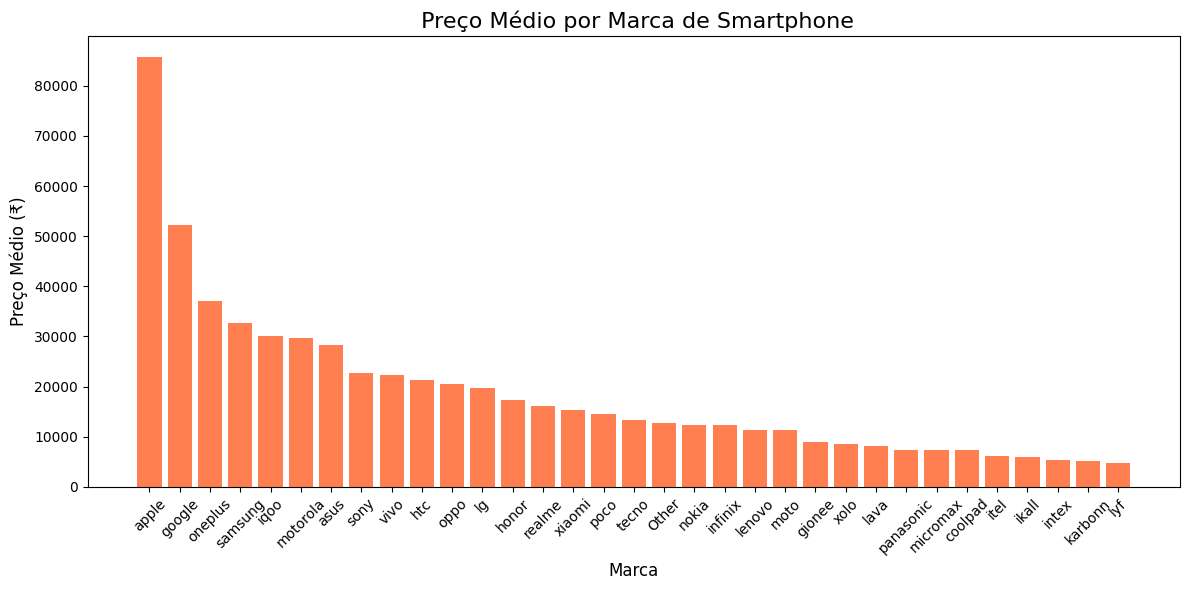

In [28]:
# Agrupando e calculando o preço médio por marca
preco_medio_marca = df.groupby('brand_name')['Price'].mean().sort_values(ascending=False)

# Tamanho da figura
plt.figure(figsize=(12, 6))

# Gráfico de barras
plt.bar(preco_medio_marca.index, preco_medio_marca.values, color='coral')

# Títulos e rótulos
plt.title(' Preço Médio por Marca de Smartphone', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Preço Médio (₹)', fontsize=12)
plt.xticks(rotation=45)

# Ajustar layout para evitar corte nos rótulos
plt.tight_layout()
plt.show()

## ***A marca Apple possui o preço médio mais alto entre todas as marcas representadas, indicando que seus produtos são posicionados no segmento premium do mercado.*** 💸

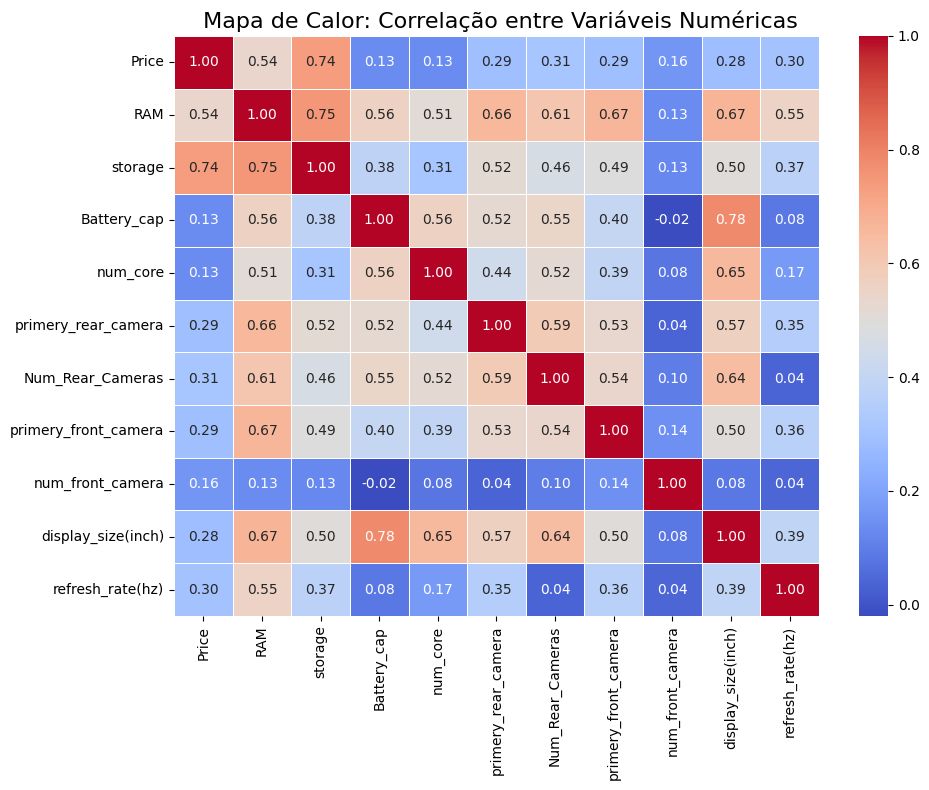

In [31]:
import seaborn as sns

# Selecionar apenas colunas numéricas
numericas = df.select_dtypes(include='number')

# Calcular correlação
correlacao = numericas.corr()

# Tamanho da figura
plt.figure(figsize=(10, 8))

# Heatmap com anotações
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Título
plt.title(' Mapa de Calor: Correlação entre Variáveis Numéricas', fontsize=16)

plt.tight_layout()
plt.show()


* Preço (Price): Apresenta uma correlação positiva forte com RAM (0.54) e armazenamento (0.74). Isto é esperado, pois smartphones com maior memória RAM e armazenamento tendem a ser mais caros.

* RAM: Além da forte correlação com o preço, a RAM mostra correlações positivas moderadas com o armazenamento e várias características da câmera.

* Armazenamento (storage): Apresenta a mais forte correlação com o preço (0.74), confirmando que maior armazenamento implica em custo mais elevado.





